# BuildStream (master) benchmarks of the Debian-like bst project

The following graphs show different benchmarking results for the time taken and the peak memory usage when invoking `bst show` and `bst build` on the *base-files/base-files.bst* element in the [Debian-like bst project](https://gitlab.com/jennis/debian-stretch-bst/tree/jennis/use_remote_file). Note that for build, benchmarks were obtained for 4, 8 and 12 builders (`bst --builders n build`). 

These benchmarks were all obtained on the same hardware (a Codethink developer machine configured to be a GitLab runner). The hardware specs are as followed:

* Linux (Debian stable)
* x86_64
* 16G RAM
* 500Gb SSD
* Intel i7-3770
* 8 cores @ 3.40 GHz

-----

The CI job which generates the data can be found [here](https://gitlab.com/jennis/benchmark_debian).

The Debian-like bst project can be found [here](https://gitlab.com/jennis/debian-stretch-bst/tree/jennis/use_remote_file).



In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Read the contents of the results file
def file_content(file):
    with open(file) as f:
        lines = f.readlines()
    return [x.strip() for x in lines]

show_content = file_content('results/show_results')
show_with_cache_content = file_content('results/show_with_cache_results')
build_4_content = file_content('results/build_4_results')
build_8_content = file_content('results/build_8_results')
build_12_content = file_content('results/build_12_results')
show_once_built_content = file_content('results/show_once_built_results')

In [3]:
# Produce a list of all the results of the show
content_lists = [show_content, show_with_cache_content,
                 build_4_content, build_8_content, build_12_content,
                 show_once_built_content]
show_results = []
show_with_cache_results = []
build_4_results = []
build_8_results = []
build_12_results = []
show_once_built_results = []
results_lists = [show_results, show_with_cache_results,
                 build_4_results, build_8_results, build_12_results,
                 show_once_built_results]

for i in range(0, len(content_lists)):
    for contents in content_lists[i]:
        measurements = contents.split(',')
        single_result_dict = {}
        for measurement in measurements:
            split = measurement.split(': ')
            single_result_dict[split[0].strip()] = split[1].strip()
        results_lists[i].append(single_result_dict)


In [4]:
from datetime import datetime
def datestring_to_datetime(date_string):
    '''Convert a datestring to a datetime object'''
    date_string = date_string[:-6]  # Remove hours and minutes of the timezone
    return datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%S")

In [5]:
# Get lists of all the values we want to plot
# x values
dates = []

# y values
show_times = []
show_with_cache_times = []
build_4_times = []
build_8_times = []
build_12_times = []
show_once_built_times = []

show_memory = []
show_with_cache_memory = []
build_4_memory = []
build_8_memory = []
build_12_memory = []
show_once_built_memory = []

# Additional data
commits = []
branches = []

# Show without cache results
for result in show_results:
    dates.append(datestring_to_datetime(result['date']))  # datetime object
    show_times.append(float(result['time']))              # float
    show_memory.append(float(result['Max-mem'])/1000)     # float (Mbytes)
    commits.append(result['commit'])                      # string
    branches.append(result['MR'] + ': ' + result['branch'])
    
# Get show with YAML cache times and memories
for result in show_with_cache_results:
    show_with_cache_times.append(float(result['time']))             # float
    show_with_cache_memory.append(float(result['Max-mem'])/1000)    # float (Mbytes)

# Get build times and memories for 4 builders
for result in build_4_results:
    build_4_times.append(float(result['time']))             # float
    build_4_memory.append(float(result['Max-mem'])/1000)    # float (Mbytes)

# Get build times and memories for 8 builders
for result in build_8_results:
    build_8_times.append(float(result['time']))             # float
    build_8_memory.append(float(result['Max-mem'])/1000)    # float (Mbytes)

# Get build times and memories for 12 builders
for result in build_12_results:
    build_12_times.append(float(result['time']))             # float
    build_12_memory.append(float(result['Max-mem'])/1000)    # float (Mbytes)
    
for result in show_once_built_results:
    show_once_built_times.append(float(result['time']))                    # float
    show_once_built_memory.append(float(result['Max-mem'])/1000)     # float (Mbytes)

In [6]:
import matplotlib.pyplot as plt

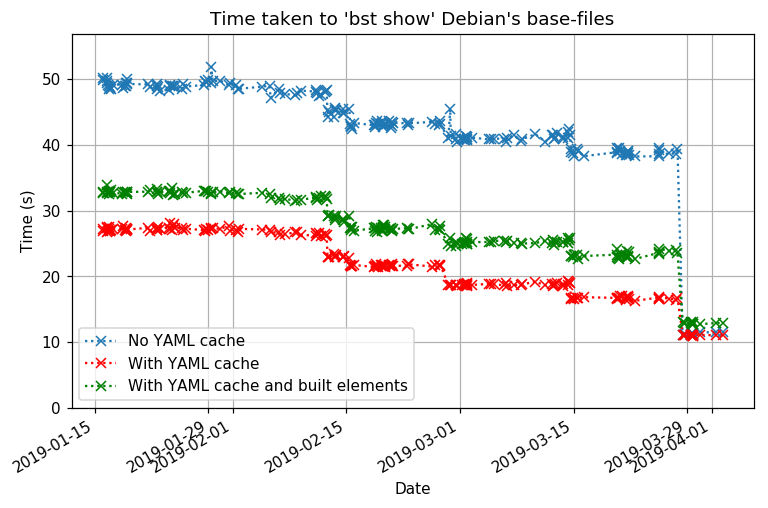

In [7]:
# Time taken to show Debian's base files
fig1, ax1 = plt.subplots(figsize=(8, 5), dpi= 110, facecolor='w', edgecolor='k')

# Plot date vs time (cache and no cache)
ax1.plot(dates, show_times,'x:', label='No YAML cache')
ax1.plot(dates, show_with_cache_times, 'x:r', label='With YAML cache')
ax1.plot(dates, show_once_built_times, 'x:g', label='With YAML cache and built elements')

# Labelling
ax1.set_title("Time taken to 'bst show' Debian's base-files")
ax1.set_xlabel('Date')
ax1.set_ylabel('Time (s)')
ax1.legend(loc='lower left')
ax1.grid()

# Limit the y axis
ax1.set_ylim([0, max([max(show_times), max(show_with_cache_times), max(show_once_built_times)])+5])
fig1.autofmt_xdate() # Make the xaxis pretty

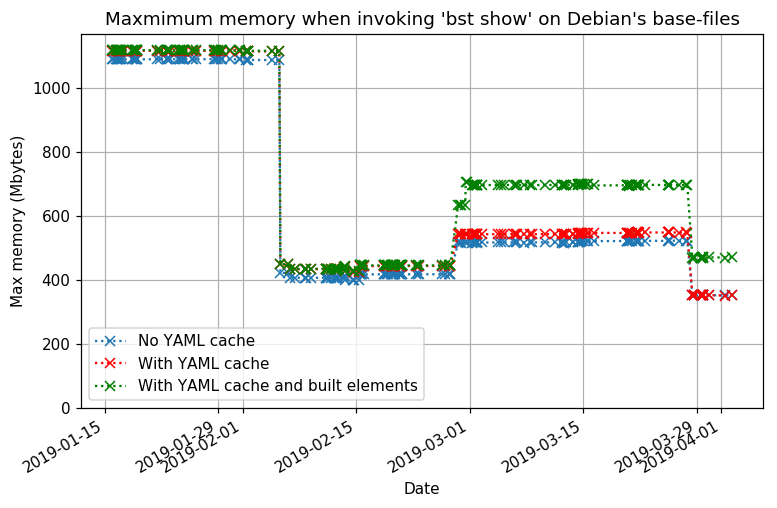

In [8]:
# Maximum memory when showing Debian's base-files
fig2, ax2 = plt.subplots(figsize=(8, 5), dpi= 110, facecolor='w', edgecolor='k')

# Plot date vs time (cache and no cache)
ax2.plot(dates, show_memory,'x:', label='No YAML cache')
ax2.plot(dates, show_with_cache_memory, 'x:r', label='With YAML cache')
ax2.plot(dates, show_once_built_memory, 'x:g', label='With YAML cache and built elements')

# Labelling
ax2.set_title("Maxmimum memory when invoking 'bst show' on Debian's base-files")
ax2.set_xlabel('Date')
ax2.set_ylabel('Max memory (Mbytes)')
ax2.legend(loc='lower left')
ax2.grid() 

# Limit the y axis
ax2.set_ylim([0, max([max(show_memory), max(show_with_cache_memory), max(show_once_built_memory)]) + 50])
fig2.autofmt_xdate() # Make the xaxis pretty

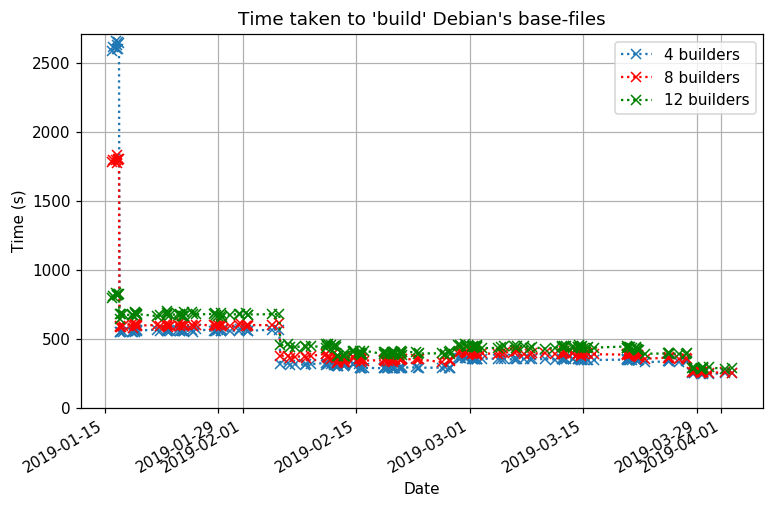

In [9]:
# Time taken to build Debian's base-files
fig3, ax3 = plt.subplots(figsize=(8, 5), dpi= 110, facecolor='w', edgecolor='k')

# Plot date vs time (cache and no cache)
ax3.plot(dates, build_4_times,'x:', label="4 builders")
ax3.plot(dates, build_8_times,'x:r', label="8 builders")
ax3.plot(dates, build_12_times,'x:g', label="12 builders")

# Labelling
ax3.set_title("Time taken to 'build' Debian's base-files")
ax3.set_xlabel('Date')
ax3.set_ylabel('Time (s)')
ax3.legend(loc='upper right')
ax3.grid()

# Limit the y axis
ax3.set_ylim([0, max([max(build_4_times), max(build_8_times), max(build_12_times)]) + 50])
fig3.autofmt_xdate() # Make the xaxis pretty

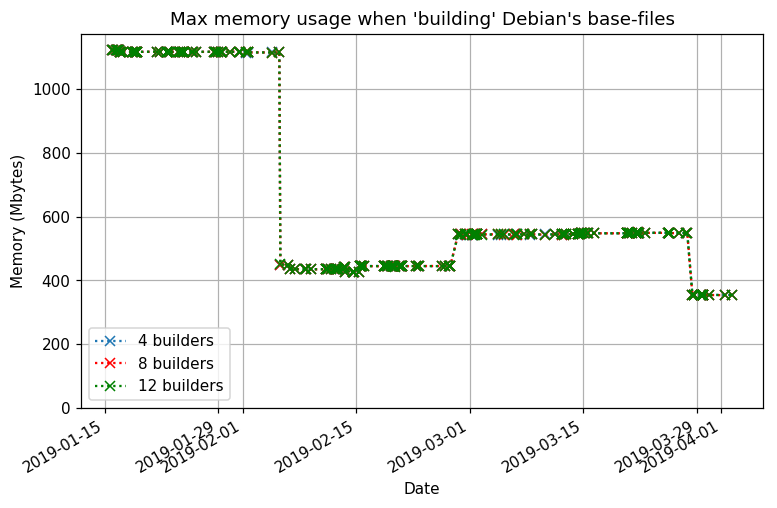

In [10]:
# Maximum memory when building Debian's base-files
fig4, ax4 = plt.subplots(figsize=(8, 5), dpi= 110, facecolor='w', edgecolor='k')

# Plot times
ax4.plot(dates, build_4_memory,'x:', label="4 builders")
ax4.plot(dates, build_8_memory,'x:r', label="8 builders")
ax4.plot(dates, build_12_memory,'x:g', label="12 builders")

# Title and label axis and add grid
ax4.set_title("Max memory usage when 'building' Debian's base-files")
ax4.set_xlabel('Date')
ax4.set_ylabel('Memory (Mbytes)')
ax4.legend(loc='lower left')
ax4.grid()

ax4.set_ylim([0, max([max(build_4_memory), max(build_8_memory), max(build_12_memory)]) + 50]) # Limit the y axis
fig4.autofmt_xdate() # Make the xaxis pretty